# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 2/17/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 2/17/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,6946,38928341,17.8
Albania,8061,2877800,280.1
Algeria,7533,43851043,17.2
Andorra,1052,77265,1361.5
Angola,266,32866268,0.8
Antarctica,0,0,NaN
Antigua and Barbuda,663,97928,677.0
Argentina,284573,45195777,629.6
Armenia,32612,2963234,1100.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Winter Olympics 2022,148,0,inf
Denmark,605974,5837213,10381.2
Iceland,27628,341250,8096.1
Netherlands,1277056,17134873,7453.0
Palau,1310,18008,7274.5
Latvia,134658,1886202,7139.1
Georgia,261692,3989175,6560.1
Estonia,83854,1326539,6321.3
Slovakia,303148,5459643,5552.5


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

2/13/22    12454304.0
2/14/22    12628843.0
2/15/22    12692053.0
2/16/22    13093881.0
2/17/22    13309040.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

2/4/22          NaN
2/5/22     127116.0
2/6/22      82363.0
2/7/22      51377.0
2/8/22     380632.0
2/9/22     252813.0
2/10/22    236080.0
2/11/22    206242.0
2/12/22    116810.0
2/13/22     62841.0
2/14/22    174539.0
2/15/22     63210.0
2/16/22    401828.0
2/17/22    215159.0
Name: Germany, dtype: float64

<AxesSubplot:>

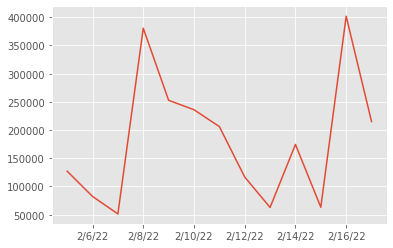

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2851.312748593648